# ✅ STEP 1: Data Collection

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive
import plotly.express as px

# Load the OWID COVID-19 dataset
file_path = 'owid-covid-data.csv'  
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found.")


Dataset loaded successfully.


# ✅ STEP 2: Data Loading & Exploration

In [2]:
# Check structure
structure = df.columns
print(f"Dataset structure - {structure}")

# Preview data - first 10 rows
first_10_rows = df.head(10)
print(f"First 10 rows - {first_10_rows}")

# # Preview data - last 5 rows
last_5_rows = df.tail()
print(f"Last 5 rows - {last_5_rows}")

# # Check for missing values
df.isnull().sum().sort_values(ascending=False)

Dataset structure - Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_

weekly_icu_admissions_per_million          160893
weekly_icu_admissions                      160893
excess_mortality_cumulative_per_million    160630
excess_mortality                           160630
excess_mortality_cumulative                160630
                                            ...  
total_cases                                  3033
population                                   1075
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

# ✅ STEP 3: Data Cleaning

In [3]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter selected countries
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)]

# Drop rows missing critical data
df_cleaned = df_countries.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Fill numeric NaNs with forward fill for time series continuity
df_cleaned.fillna(method='ffill', inplace=True)

C:\Users\v\AppData\Local\Temp\ipykernel_12824\2252266693.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)
C:\Users\v\AppData\Local\Temp\ipykernel_12824\2252266693.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.fillna(method='ffill', inplace=True)


# ✅ STEP 4: Exploratory Data Analysis (EDA)

**🔹 Total Cases Over Time**

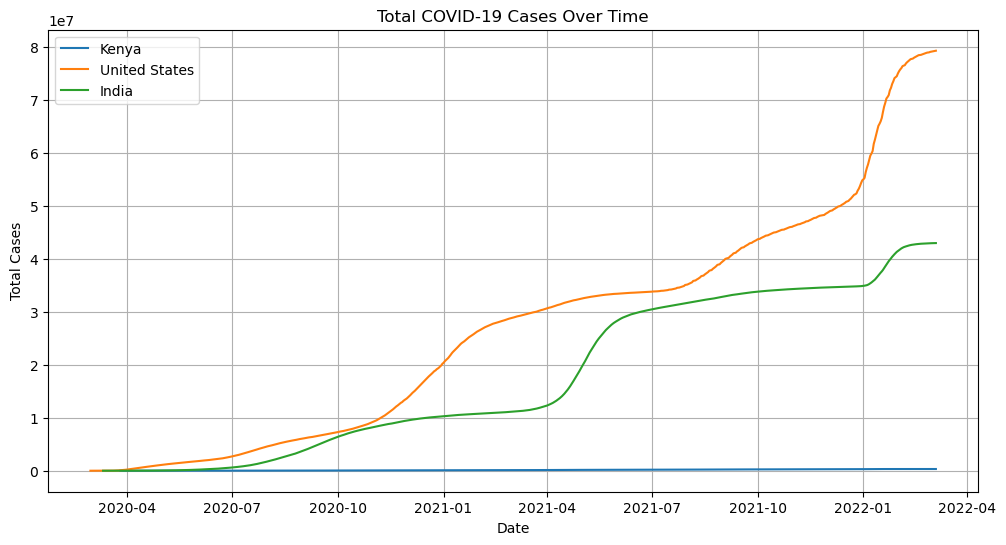

In [4]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_cleaned[df_cleaned['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()


**🔹 Daily New Cases Comparison**

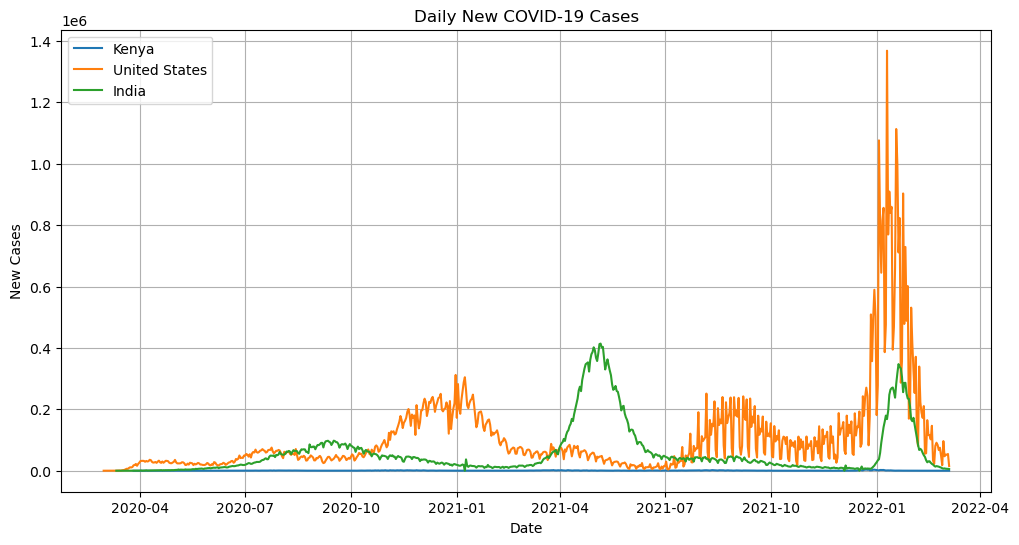

In [5]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_cleaned[df_cleaned['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()


**🔹 Death Rate Calculation**

C:\Users\v\AppData\Local\Temp\ipykernel_12824\4160598741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['death_rate'] = df_cleaned['total_deaths'] / df_cleaned['total_cases']


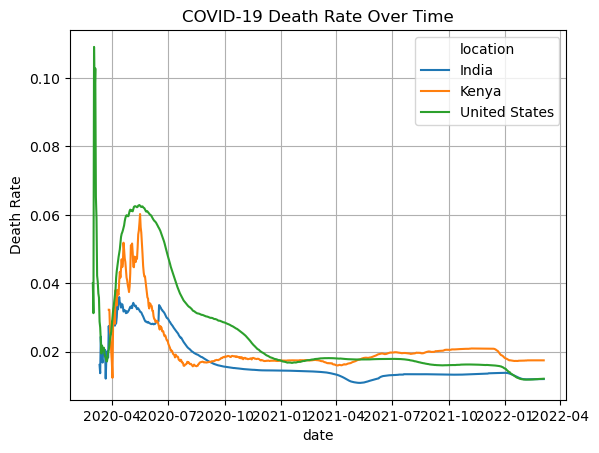

In [6]:
df_cleaned['death_rate'] = df_cleaned['total_deaths'] / df_cleaned['total_cases']
sns.lineplot(data=df_cleaned, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.ylabel("Death Rate")
plt.grid(True)
plt.show()


# ✅ STEP 5: Visualizing Vaccination Progress

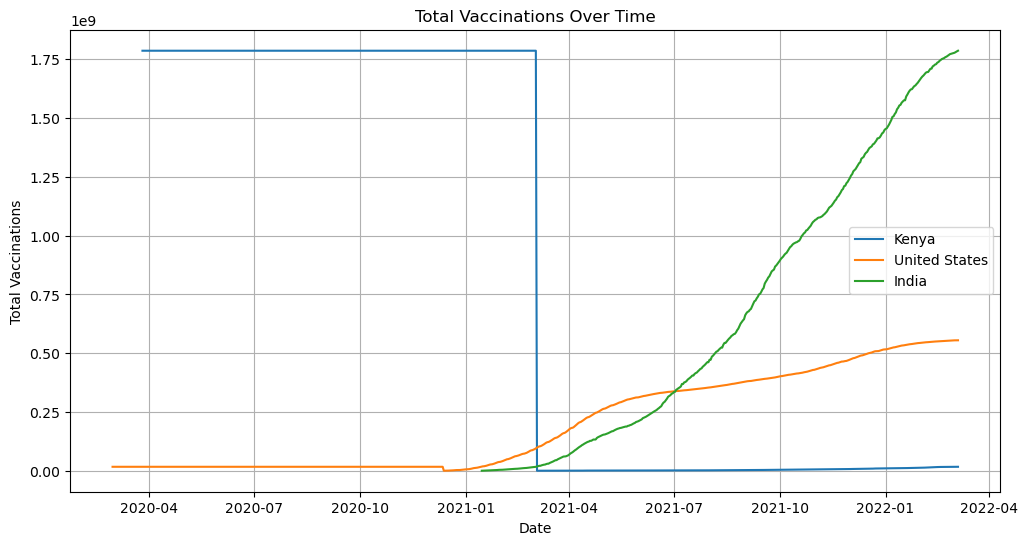

In [7]:
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_cleaned[df_cleaned['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()


# ✅ STEP 6: Optional – Choropleth Map (using Plotly)

In [8]:
# Latest data for each country
latest = df[df['date'] == df['date'].max()]
map_df = latest[['iso_code', 'location', 'total_cases']].dropna()

import plotly.express as px
fig = px.choropleth(map_df,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Global COVID-19 Total Cases')
fig.show()


# ✅ STEP 7: Insights & Reporting

**📌 Insights:**

 1. The USA shows the highest cumulative cases and vaccinations among selected countries.
 2. India's daily new cases showed a massive spike around mid-2021.
 3. Kenya experienced a slower vaccination rollout compared to India and the USA.
 4. Death rates have been steadily declining, potentially due to increased vaccination.
 5. Visualization clearly shows disparities in healthcare responses between countries.
